In [1]:
import os
import time as tm
import numpy as np
import pandas as pd
from scHPL import train, predict, evaluate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

from load_dataset import load_dataset
from mlp_generalized import run_mlp
from cnn_generalized import run_cnn
from onehotencode import onehotencode
from split_dataset import split_dataset
from results import result

In [2]:
data_path = '~/Documents/study/Masters DSS/Thesis/Data/Simulated/Simulated_data.csv'
label_path = '~/Documents/study/Masters DSS/Thesis/Data/Simulated/Simulated_labels.csv'

X, Y = load_dataset(data_path, label_path)
print("shape of data: ", X.shape)
print("shape of labels:", Y.shape)

shape of data:  (8839, 9000)
shape of labels: (8839, 1)


In [3]:
Y = Y['data1.Group']
print("shape of labels now:", Y.shape)

shape of labels now: (8839,)


In [4]:
# one hot encode labels
ohe, y_dummy = onehotencode(Y)
print(y_dummy.shape)
# split the data into train, validation and test set
x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test = split_dataset(X, y_dummy)

(8839, 6)
shape of train set:  (7071, 9000)  and labels:  (7071, 6) 

shape of test set:  (1768, 9000)  and labels:  (1768, 6) 

Shape of train and validation set to check for overfitting
shape of train set:  (6363, 9000)  and labels:  (6363, 6) 

shape of validation set:  (708, 9000)  and labels:  (708, 6)


## Linear SVM performance

shape of labels in training set:  (7071,)
shape of labels in test set:  (1768,)


/Users/vartika/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training time: 35.221745014190674
Predict time: 0.331510066986084
Accuracy of test set:  1.0
F1-score of test set:  1.0
Precision of test set: 1.0
Recall of test set: 1.0
Classification report of test set:
               precision    recall  f1-score   support

      Group1       1.00      1.00      1.00       302
      Group2       1.00      1.00      1.00       285
      Group3       1.00      1.00      1.00       294
      Group4       1.00      1.00      1.00       285
      Group5       1.00      1.00      1.00       306
      Group6       1.00      1.00      1.00       296

    accuracy                           1.00      1768
   macro avg       1.00      1.00      1.00      1768
weighted avg       1.00      1.00      1.00      1768



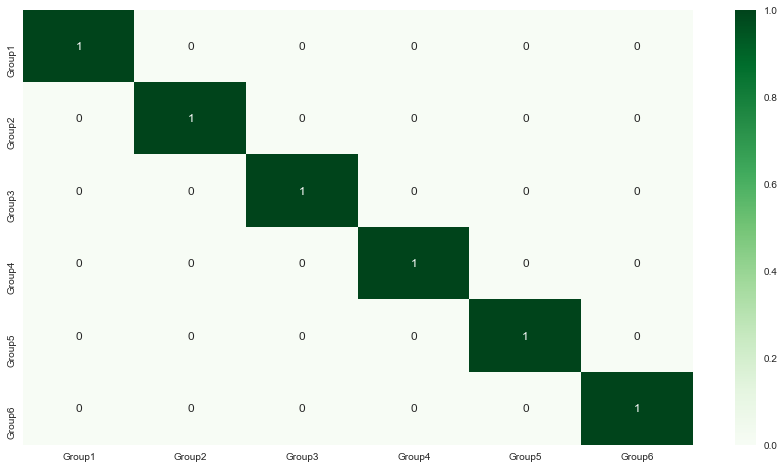

In [5]:
inv_train = ohe.inverse_transform(y_train).ravel()
inv_test = ohe.inverse_transform(y_test).ravel()
print("shape of labels in training set: ", inv_train.shape)
print("shape of labels in test set: ", inv_test.shape)

start = tm.time()
lin_svm = train.svm.LinearSVC()
lin_svm.fit(x_train, inv_train)
training_time = tm.time()-start
print('Training time:', training_time)

start = tm.time()
y_pred = lin_svm.predict(x_test)
test_time = tm.time()-start
print('Predict time:', test_time)

result(inv_test, y_pred)

## MLP performance

Train the model to check for overfitting


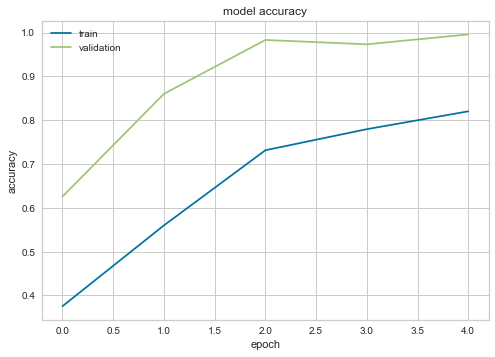

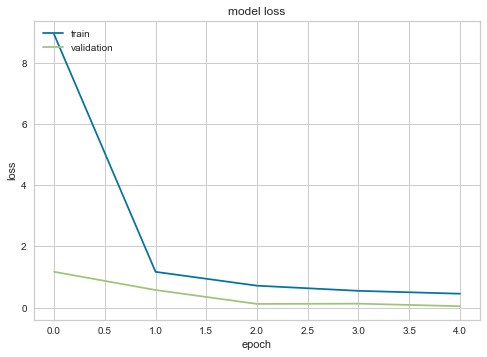

train the final model
Epoch 1/5
221/221 [==============================] - 10s 43ms/step - loss: 0.4085 - accuracy: 0.8340
Epoch 2/5
221/221 [==============================] - 8s 36ms/step - loss: 0.3865 - accuracy: 0.8433
Epoch 3/5
221/221 [==============================] - 7s 33ms/step - loss: 0.3459 - accuracy: 0.8576
Epoch 4/5
221/221 [==============================] - 9s 40ms/step - loss: 0.3426 - accuracy: 0.8542
Epoch 5/5
221/221 [==============================] - 10s 46ms/step - loss: 0.3317 - accuracy: 0.8606
Training time: 43.960872173309326
Predict time: 1.113874912261963
The results are as follows:
Accuracy of test set:  0.997737556561086
F1-score of test set:  0.9977336812162386
Precision of test set: 0.9977527852348512
Recall of test set: 0.997737556561086
Classification report of test set:
               precision    recall  f1-score   support

      Group1       1.00      1.00      1.00       302
      Group2       0.99      1.00      1.00       285
      Group3       1

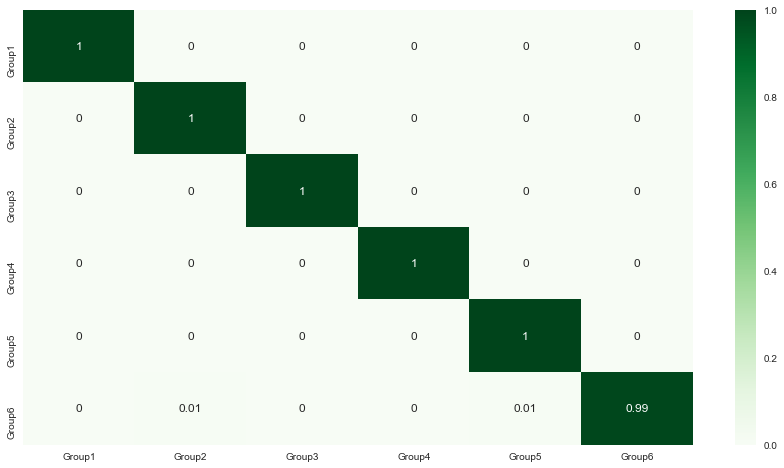

In [5]:
run_mlp(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)

## CNN performance

Train the model to check for overfitting


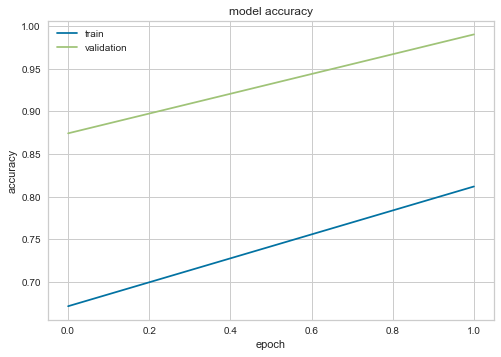

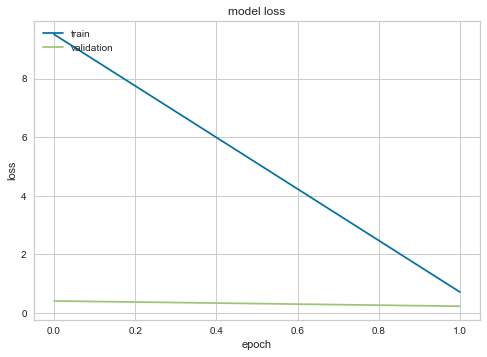

train the final model
Epoch 1/2
221/221 [==============================] - 169s 762ms/step - loss: 0.3226 - accuracy: 0.8884
Epoch 2/2
221/221 [==============================] - 167s 757ms/step - loss: 0.1430 - accuracy: 0.9511
Training time: 336.176481962204
Predict time: 6.047781944274902
The results are as follows:
Accuracy of test set:  1.0
F1-score of test set:  1.0
Precision of test set: 1.0
Recall of test set: 1.0
Classification report of test set:
               precision    recall  f1-score   support

      Group1       1.00      1.00      1.00       302
      Group2       1.00      1.00      1.00       285
      Group3       1.00      1.00      1.00       294
      Group4       1.00      1.00      1.00       285
      Group5       1.00      1.00      1.00       306
      Group6       1.00      1.00      1.00       296

    accuracy                           1.00      1768
   macro avg       1.00      1.00      1.00      1768
weighted avg       1.00      1.00      1.00      17

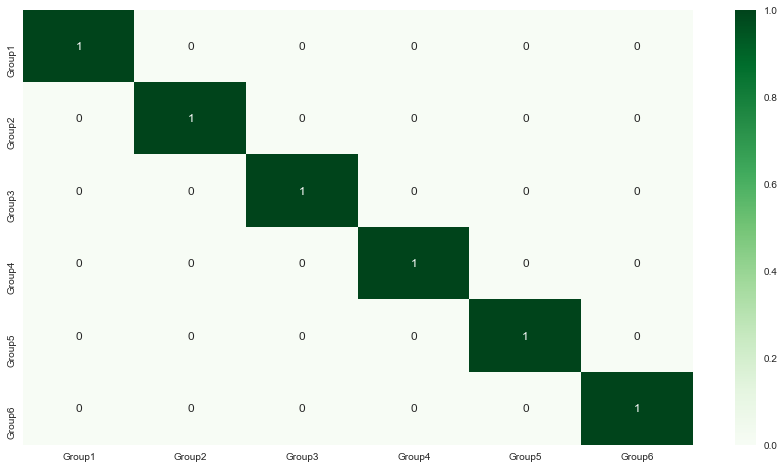

In [5]:
x_tr = np.expand_dims(x_tr,axis=-1)
x_val = np.expand_dims(x_val,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)
x_train = np.expand_dims(x_train,axis=-1)
run_cnn(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)